In [26]:
import cPickle as pickle
import numpy as np
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu2,floatX=float32"
from PIL import Image
import json
from scipy import ndimage
import math
import random

from retrainUnariesNet import unaryNet2
import MyConfig

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
unaryModel = unaryNet2()

Preparing room
len bbox_cam_list 7
sigma 0.133494 ,  0.092593
alpha 0.029933 ,  -0.359034
sigma 0.144286 ,  0.090475
alpha 0.001415 ,  0.361259
sigma 0.08403 ,  0.132242
alpha 0.154849 ,  0.003785
sigma 0.079964 ,  0.146991
alpha 0.378756 ,  -0.256611
sigma 0.082911 ,  0.161009
alpha -0.367645 ,  0.224522
sigma 0.094225 ,  0.132504
alpha -0.343628 ,  -0.281467
sigma 0.088076 ,  0.128434
alpha -0.115129 ,  0.001928
sigma 0.081479 ,  0.147307
alpha 0.375871 ,  0.257419
Initializing Unaries Network


VGG/VGGNet.py:46: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  p1 = theano.tensor.signal.pool.pool_2d(c12, ds = (2,2), st = (2,2), ignore_border=True)
VGG/VGGNet.py:46: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  p1 = theano.tensor.signal.pool.pool_2d(c12, ds = (2,2), st = (2,2), ignore_border=True)
VGG/VGGNet.py:50: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  p2 = theano.tensor.signal.pool.pool_2d(c22, ds = (2,2), st = (2,2), ignore_border=True)
VGG/VGGNet.py:50: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  p2 = theano.tensor.signal.pool.pool_2d(c22, ds = (2,2), st = (2,2), ignore_border=True)
VGG/VGGNet.py:55: UserWarning: DEPRECATION: the 

In [43]:
print MyConfig.unary_storedParam
params_to_load = pickle.load(open(MyConfig.unary_storedParam,'rb'))
unaryModel.setParams(params_to_load)
            
params_VGG= pickle.load(open(MyConfig.refinedVGG_storedParam,'rb'))
unaryModel.mNet.setParams(params_VGG)

./Unaries/trainedModels/params_Unaries_59.pickle


samples


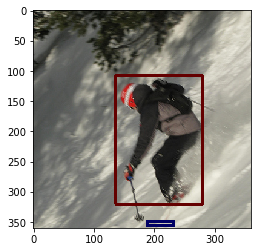

result


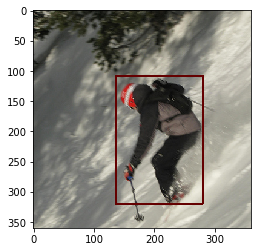

samples


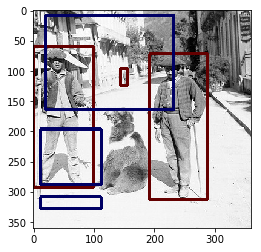

result


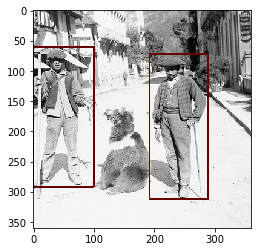

samples


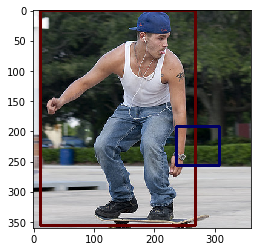

result


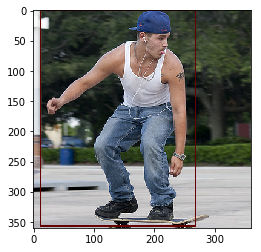

samples


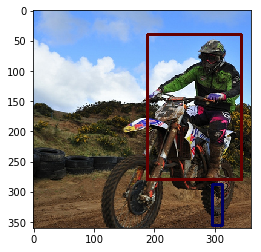

result


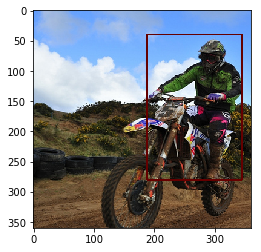

samples


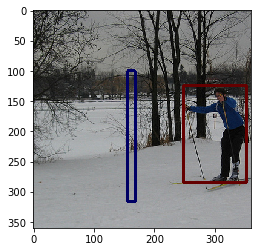

result


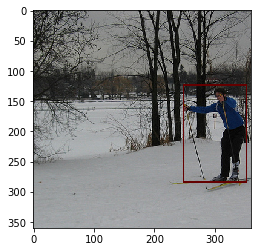

In [48]:
with open(MyConfig.test_u_boxList) as read_file:
    u_boxList = json.load(read_file)
with open(MyConfig.test_u_imgList) as read_file:
    u_imgList = json.load(read_file)

for img, boxes in zip(u_imgList, u_boxList):
    x, rois_np, labels = unaryModel.load_batch_train(img, boxes)
    print 'samples'
    unaryModel.visualize_batch(x,rois_np,labels)
    
    p_out, loss = unaryModel.test_func(x, rois_np, labels)
    p = p_out[:,0]
    print 'result'
    unaryModel.visualize_positives(x,rois_np,p)